# The Sparks Foundation :- GRIP <Task 2>
### Topic :- Prediction Using Unsupervised ML

### Author :- Abhishek Sachin Deshmukh 

### K-Means Clustering
* In this task, we will predict the optimum number of clusters in Iris-dataset and represnt it visually.

In [1]:
# Importing all required libraries

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# Load the iris dataset

from sklearn.datasets import load_iris
iris = load_iris()

In [13]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [48]:
# Visualising Iris-dataset corresponding to Feature-Names 

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### How do you find the optimum number of clusters for K Means? How does one determine the value of K?

* Finding the optimum number of clusters for k-means classification

In [21]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
k_rng = range(1,11)

In [46]:
# Importing KMeans Library

from sklearn.cluster import KMeans

In [32]:
wcss =[]
for i in range(1,11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0 )
    km.fit(x)
    wcss.append(km.inertia_)

In [33]:
wcss

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.22847321428572,
 46.47223015873018,
 39.03998724608725,
 34.299712121212146,
 30.063110617452732,
 28.27172172856384,
 26.094324740540422]

### Plotting the results onto a line graph, 

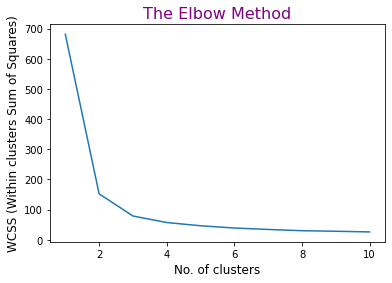

In [34]:
plt.plot(k_rng, sse)
plt.title("The Elbow Method", size=16, color='purple')
plt.xlabel("No. of clusters", size=12)
plt.ylabel("WCSS (Within clusters Sum of Squares)", size=12)
plt.show()

* You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.
* From this we choose the number of clusters as '3'.

##  Applying kmeans to the dataset

In [35]:
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
y_km = km.fit_predict(x)

### Visualising the clusters - On the first two columns

In [45]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

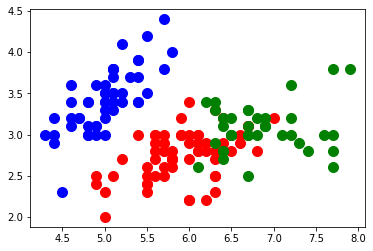

In [37]:
plt.scatter(x[y_km == 0, 0], x[y_km == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_km == 1, 0], x[y_km == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_km == 2, 0], x[y_km == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

### Plotting the Centroids of the clusters

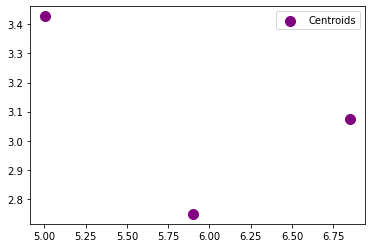

In [41]:
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], 
            s = 100, c = 'purple', label = 'Centroids')
plt.legend()